In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(estimator=KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

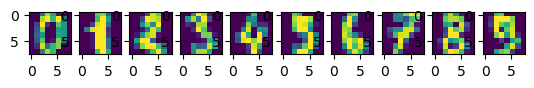

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [4]:
X, y = digits.data, digits.target

In [5]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X,y)
model.score(X, y)

1.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

model.score(X_test, y_test)

1.0

In [8]:
accuracies = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(f"{i} : {accuracies[i]}")
print(f"la moyenne: {np.mean(accuracies)}, l'écart type:{np.std(accuracies)}")

0 : 0.9
1 : 0.8222222222222222
2 : 0.9222222222222223
3 : 0.8555555555555555
4 : 0.8888888888888888
5 : 0.8111111111111111
6 : 0.8666666666666667
7 : 0.8888888888888888
8 : 0.8444444444444444
9 : 0.8666666666666667
10 : 0.8777777777777778
11 : 0.8777777777777778
12 : 0.8666666666666667
13 : 0.9
14 : 0.8666666666666667
15 : 0.8888888888888888
16 : 0.8777777777777778
17 : 0.8444444444444444
18 : 0.8444444444444444
19 : 0.8111111111111111
20 : 0.8555555555555555
21 : 0.8111111111111111
22 : 0.8777777777777778
23 : 0.8222222222222222
24 : 0.8777777777777778
25 : 0.8222222222222222
26 : 0.8555555555555555
27 : 0.9
28 : 0.9
29 : 0.8333333333333334
30 : 0.8888888888888888
31 : 0.8111111111111111
32 : 0.7888888888888889
33 : 0.8
34 : 0.8666666666666667
35 : 0.8666666666666667
36 : 0.8666666666666667
37 : 0.8666666666666667
38 : 0.8333333333333334
39 : 0.8444444444444444
40 : 0.8777777777777778
41 : 0.8888888888888888
42 : 0.8555555555555555
43 : 0.8666666666666667
44 : 0.8888888888888888
45 : 

In [9]:
model = BaggingClassifier(DecisionTreeClassifier(random_state=0), max_features=0.5, n_estimators=200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

In [10]:
accuracy = []
n_estimators = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
for i in range(30):
    model2 = BaggingClassifier(DecisionTreeClassifier(random_state=0),max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    accuracy.append(model2.score(X_test, y_test))
    n_estimators.append((i+1)*10)

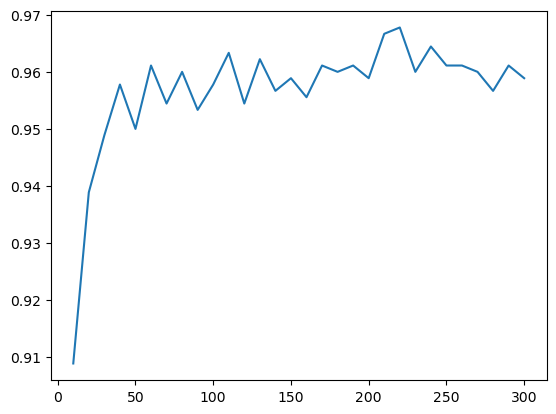

In [11]:
plt.figure()
plt.plot(n_estimators, accuracy)

In [12]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param = {"max_samples":np.linspace(0.1,0.9,9), 
         "max_features":np.linspace(0.1,0.9,9)}
grid = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=0)), param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0)),
             param_grid={'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [15]:
grid.best_estimator_.score(X_test, y_test)

0.9354838709677419

In [16]:
grid.best_params_

{'max_features': 0.5, 'max_samples': 0.7000000000000001}

In [17]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [19]:
clf.score(X_test, y_test)

0.9227441285537701

In [20]:
modeltree = DecisionTreeClassifier(random_state=0)
modeltree.fit(X_train, y_train)
modeltree.score(X_test, y_test)

0.7274412855377008

In [21]:
bagg = BaggingClassifier(DecisionTreeClassifier(random_state=0), max_features=0.5, max_samples=0.5, n_estimators=200)
bagg.fit(X_train, y_train)
bagg.score(X_test, y_test)

0.8967861557478368

In [22]:
rf = RandomForestClassifier(random_state=0, n_estimators=200)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9227441285537701

In [23]:
bagging_accuracies = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)
    model5 = BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=30)
    model5.fit(X_train, y_train)
    bagging_accuracies.append(model5.score(X_test, y_test))
print(f"la moyenne: {np.mean(bagging_accuracies)}, l'écart type:{np.std(bagging_accuracies)}")

la moyenne: 0.9382647385984427, l'écart type:0.006077325196728679


In [24]:
rf_accuracies  = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)
    model5 = BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=30)
    model5.fit(X_train, y_train)
    rf_accuracies.append(model5.score(X_test, y_test))
print(f"la moyenne: {np.mean(rf_accuracies)}, l'écart type:{np.std(rf_accuracies)}")

la moyenne: 0.9434927697441603, l'écart type:0.003749121144906049


In [25]:
accuracy = []
n_estimators = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
for i in range(30):
    model2 = RandomForestClassifier(n_estimators=(i+1)*10)
    model2.fit(X_train, y_train)
    accuracy.append(model2.score(X_test, y_test))
    n_estimators.append((i+1)*10)

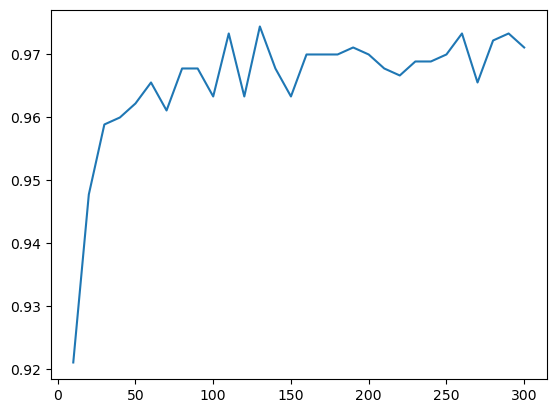

In [26]:
plt.figure()
plt.plot(n_estimators, accuracy)

In [34]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

RF = RandomForestClassifier(n_estimators=50, random_state=0)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.9744160177975528

In [38]:
ET =ExtraTreesClassifier(n_estimators=50)
ET.fit(X_train, y_train)
ET.score(X_test, y_test)

0.9688542825361512

In [40]:
AB = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
AB.fit(X_train, y_train)
AB.score(X_test, y_test)

C:\Users\medjb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9632925472747497

In [ ]:
plt.figure()
plt.plot()